机器学习预测分析报告
1. 训练回归模型中...
训练模型: Linear Regression
  Linear Regression - R²: 0.0486, MAE: 230.9279, MAPE: 58.97%
训练模型: Ridge Regression
  Ridge Regression - R²: 0.0254, MAE: 223.5506, MAPE: 57.06%
训练模型: Lasso Regression
  Lasso Regression - R²: 0.0467, MAE: 230.6534, MAPE: 58.83%
训练模型: Random Forest
  Random Forest - R²: 0.1667, MAE: 197.5168, MAPE: 50.27%
训练模型: SVR
  SVR - R²: -0.3561, MAE: 246.7787, MAPE: 51.69%
训练模型: MLP Regressor
  MLP Regressor - R²: -0.0585, MAE: 221.4939, MAPE: 38.17%
训练模型: XGBoost
  XGBoost - R²: 0.2012, MAE: 198.0156, MAPE: 51.12%
训练模型: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 44, number of used features: 9
[LightGBM] [Info] Start training from score 373.580794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

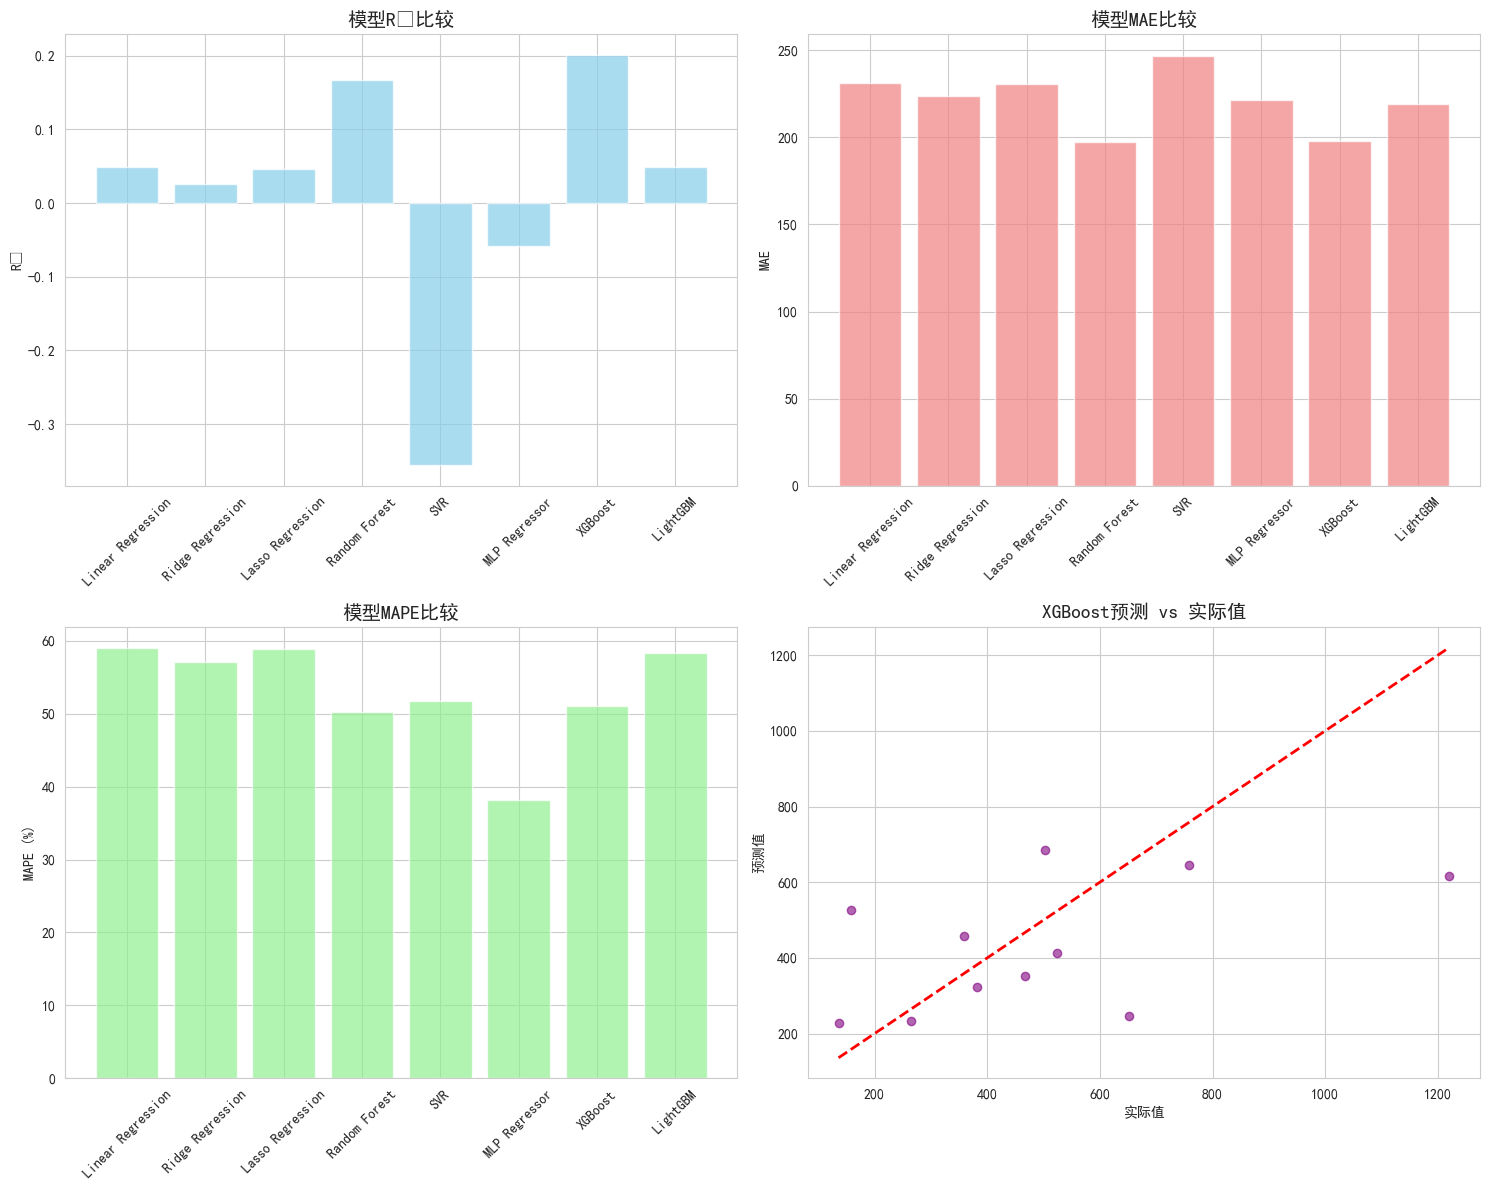

10:57:42 - cmdstanpy - INFO - Chain [1] start processing
10:57:42 - cmdstanpy - INFO - Chain [1] done processing


3. 时间序列预测...


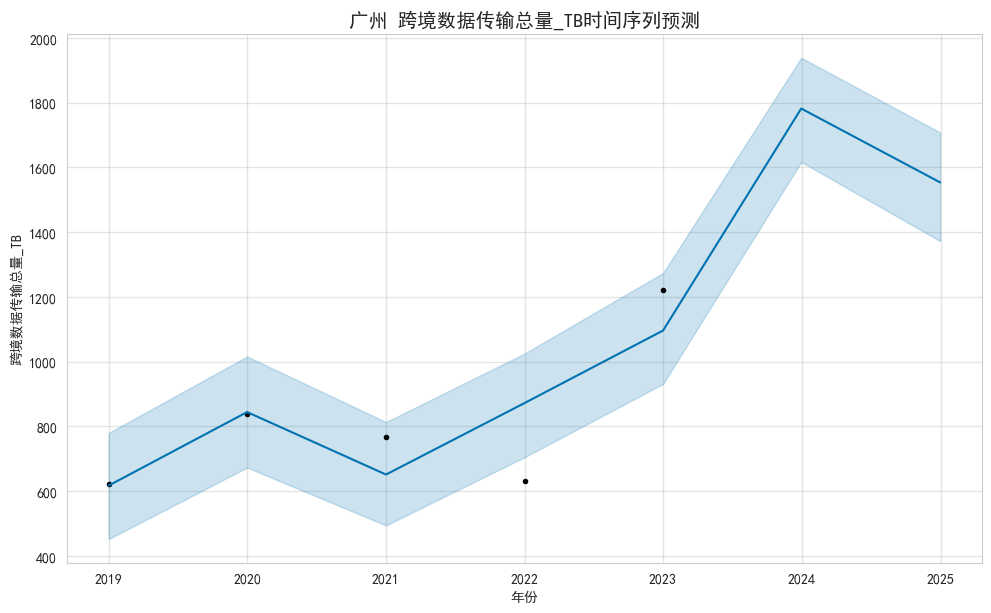

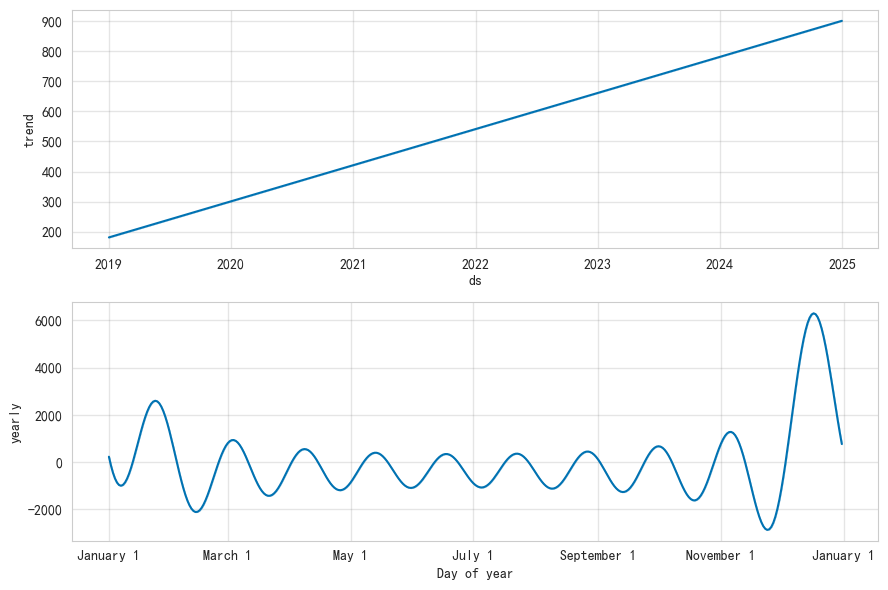

   2024-2025年预测结果已生成
4. 特征重要性分析...


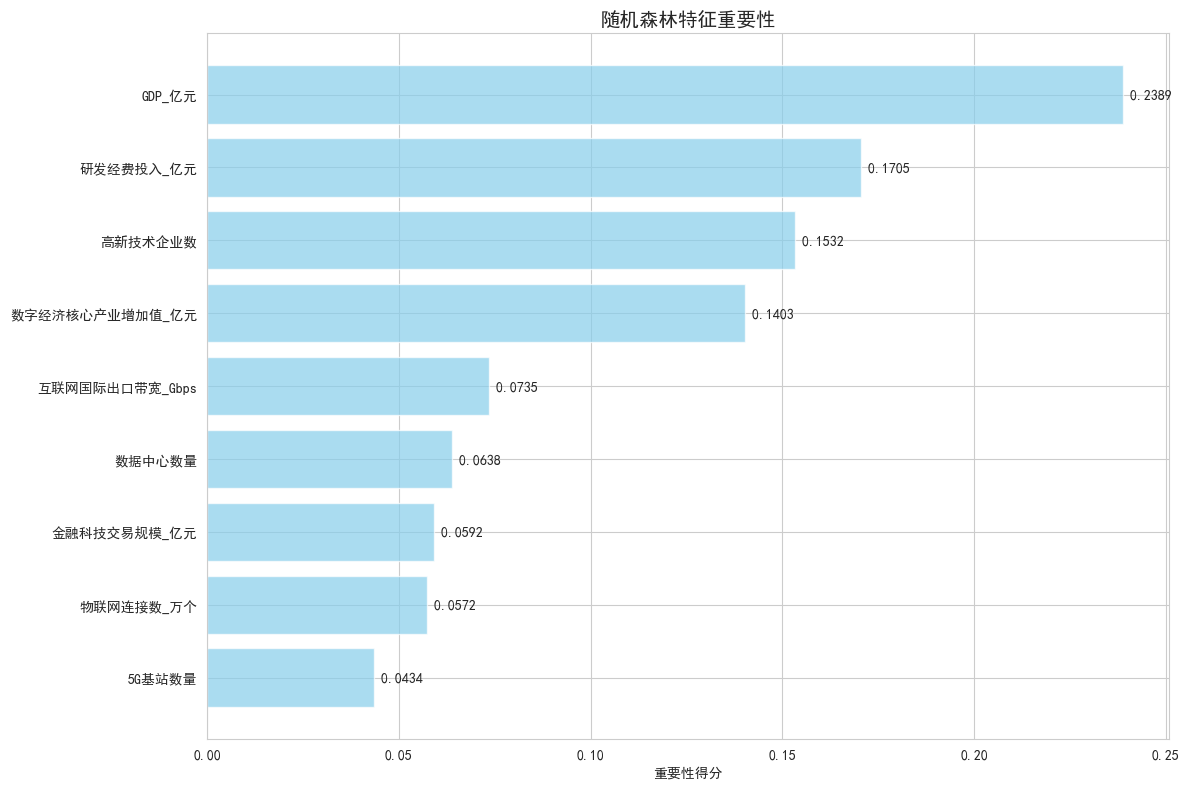


特征重要性排名:
       feature  importance
        GDP_亿元    0.238910
     研发经费投入_亿元    0.170463
       高新技术企业数    0.153222
数字经济核心产业增加值_亿元    0.140288
互联网国际出口带宽_Gbps    0.073512
        数据中心数量    0.063802
   金融科技交易规模_亿元    0.059157
     物联网连接数_万个    0.057221
        5G基站数量    0.043425
5. 超参数调优...
最佳参数: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
最佳交叉验证分数: 0.0885670837028704
调优后测试集R²: 0.1433
6. 模型解释性分析...


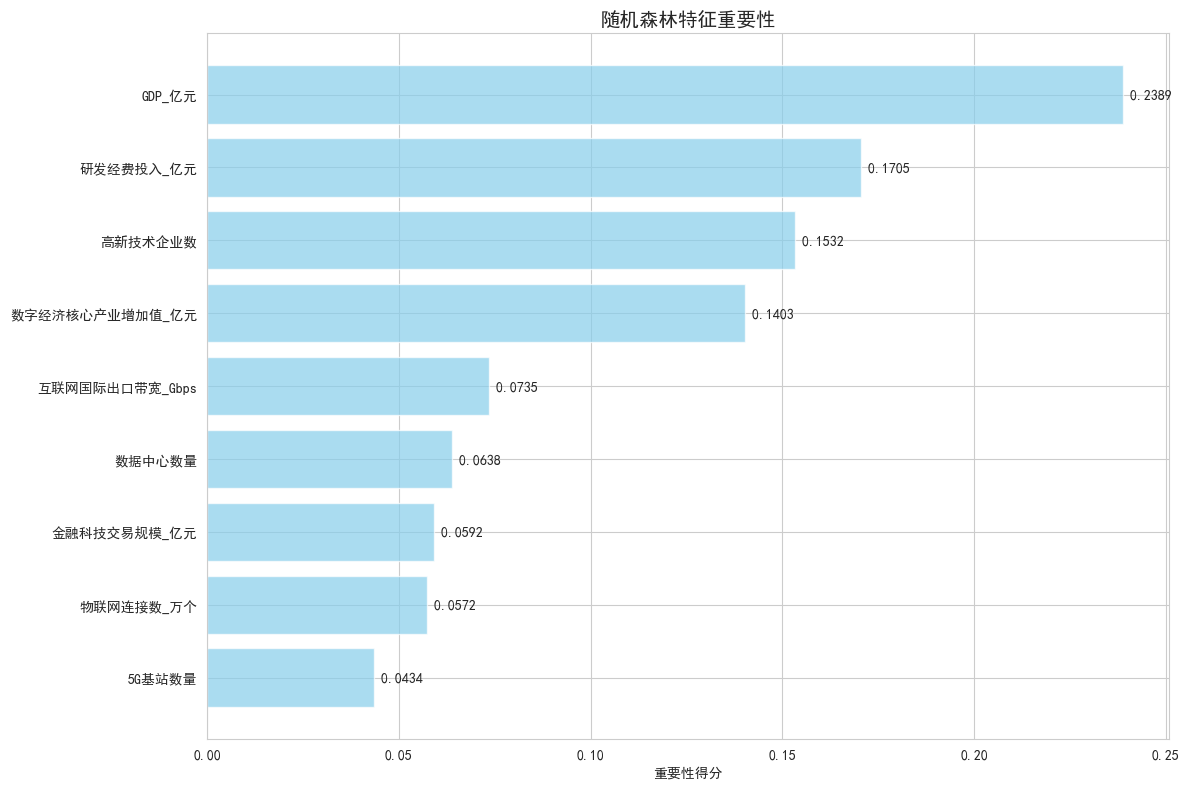


特征重要性排名:
       feature  importance
        GDP_亿元    0.238910
     研发经费投入_亿元    0.170463
       高新技术企业数    0.153222
数字经济核心产业增加值_亿元    0.140288
互联网国际出口带宽_Gbps    0.073512
        数据中心数量    0.063802
   金融科技交易规模_亿元    0.059157
     物联网连接数_万个    0.057221
        5G基站数量    0.043425


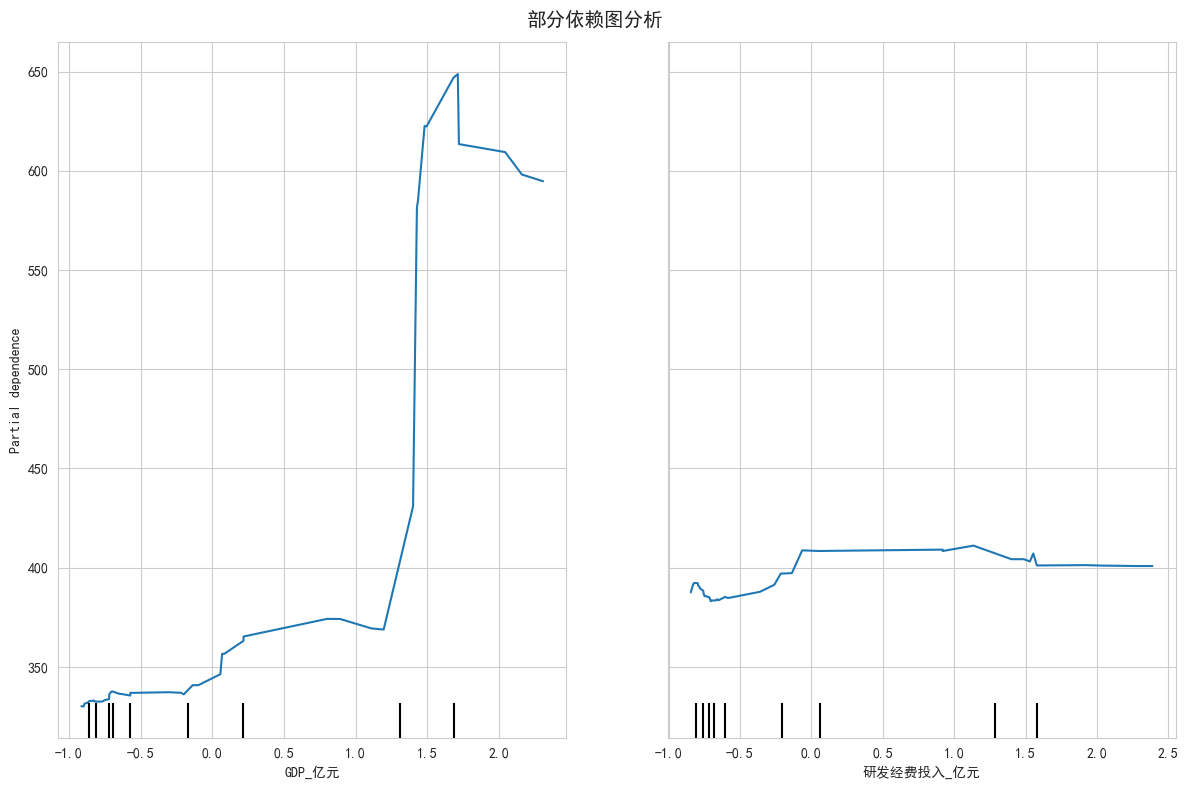


总结:
   最佳模型: XGBoost
   最佳R²: 0.2012
   最重要特征: GDP_亿元 (重要性: 0.2389)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图形样式
sns.set_style("whitegrid", {'font.sans-serif': ['SimHei', 'Microsoft YaHei']})

class MachineLearningPredictor:
    def __init__(self, main_data_path):
        """初始化机器学习预测类"""
        self.data = pd.read_csv(main_data_path)
        self.models = {}
        self.results = {}
        self.feature_columns = None  # 存储特征列名
        self.scaler = None  # 存储标准化器
        
    def prepare_regression_data(self, target_variable='跨境数据传输总量_TB'):
        """准备回归预测数据"""
        # 选择特征变量
        self.feature_columns = [
            'GDP_亿元', '数字经济核心产业增加值_亿元', '研发经费投入_亿元',
            '高新技术企业数', '5G基站数量', '物联网连接数_万个',
            '金融科技交易规模_亿元', '数据中心数量', '互联网国际出口带宽_Gbps'
        ]
        
        # 创建特征矩阵和目标变量
        X = self.data[self.feature_columns]
        y = self.data[target_variable]
        
        # 处理缺失值
        X = X.fillna(X.mean())
        y = y.fillna(y.mean())
        
        # 数据标准化
        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)
        
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )
        
        return X_train, X_test, y_train, y_test
    
    def prepare_data_for_importance(self, target_variable='跨境数据传输总量_TB'):
        """准备用于特征重要性分析的数据（不分割）"""
        if self.feature_columns is None:
            self.feature_columns = [
                'GDP_亿元', '数字经济核心产业增加值_亿元', '研发经费投入_亿元',
                '高新技术企业数', '5G基站数量', '物联网连接数_万个',
                '金融科技交易规模_亿元', '数据中心数量', '互联网国际出口带宽_Gbps'
            ]
        
        X = self.data[self.feature_columns]
        y = self.data[target_variable]
        
        # 处理缺失值
        X = X.fillna(X.mean())
        y = y.fillna(y.mean())
        
        # 数据标准化
        if self.scaler is None:
            self.scaler = StandardScaler()
            X_scaled = self.scaler.fit_transform(X)
        else:
            X_scaled = self.scaler.transform(X)
        
        return X_scaled, y
    
    def train_regression_models(self):
        """训练多种回归模型"""
        X_train, X_test, y_train, y_test = self.prepare_regression_data()
        
        # 定义模型
        models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0),
            'Lasso Regression': Lasso(alpha=0.1),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'SVR': SVR(kernel='rbf', C=1.0),
            'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42),
            'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
            'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
        }
        
        # 训练和评估模型
        model_results = {}
        
        for name, model in models.items():
            print(f"训练模型: {name}")
            
            # 训练模型
            model.fit(X_train, y_train)
            self.models[name] = model
            
            # 预测
            y_pred = model.predict(X_test)
            
            # 计算评估指标
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
            
            model_results[name] = {
                'MSE': mse,
                'MAE': mae,
                'R2': r2,
                'MAPE': mape,
                'predictions': y_pred
            }
            
            print(f"  {name} - R²: {r2:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")
        
        self.results['regression'] = model_results
        return model_results
    
    def plot_regression_results(self):
        """绘制回归模型结果"""
        if 'regression' not in self.results:
            print("请先训练回归模型")
            return
        
        results = self.results['regression']
        
        # 模型性能比较
        metrics_df = pd.DataFrame({
            model: [results[model]['R2'], results[model]['MAE'], results[model]['MAPE']]
            for model in results.keys()
        }, index=['R²', 'MAE', 'MAPE']).T
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # R²比较
        axes[0, 0].bar(metrics_df.index, metrics_df['R²'], color='skyblue', alpha=0.7)
        axes[0, 0].set_title('模型R²比较', fontsize=14, fontweight='bold')
        axes[0, 0].set_ylabel('R²')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # MAE比较
        axes[0, 1].bar(metrics_df.index, metrics_df['MAE'], color='lightcoral', alpha=0.7)
        axes[0, 1].set_title('模型MAE比较', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('MAE')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # MAPE比较
        axes[1, 0].bar(metrics_df.index, metrics_df['MAPE'], color='lightgreen', alpha=0.7)
        axes[1, 0].set_title('模型MAPE比较', fontsize=14, fontweight='bold')
        axes[1, 0].set_ylabel('MAPE (%)')
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # 预测 vs 实际值散点图 (使用最佳模型)
        best_model_name = metrics_df['R²'].idxmax()
        best_predictions = results[best_model_name]['predictions']
        _, X_test, _, y_test = self.prepare_regression_data()
        
        axes[1, 1].scatter(y_test, best_predictions, alpha=0.6, color='purple')
        axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[1, 1].set_xlabel('实际值')
        axes[1, 1].set_ylabel('预测值')
        axes[1, 1].set_title(f'{best_model_name}预测 vs 实际值', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('回归模型比较.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return metrics_df
    
    def time_series_forecasting(self, city='广州', variable='跨境数据传输总量_TB'):
        """时间序列预测"""
        # 准备时间序列数据
        city_data = self.data[self.data['城市'] == city]
        city_data = city_data.sort_values('年份')
        
        ts_data = city_data[['年份', variable]].set_index('年份')
        
        # 使用Prophet进行预测
        prophet_data = pd.DataFrame({
            'ds': pd.to_datetime(ts_data.index.astype(str)),
            'y': ts_data[variable].values
        })
        
        # 训练Prophet模型
        model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False
        )
        model.fit(prophet_data)
        
        # 创建未来数据框
        future = model.make_future_dataframe(periods=2, freq='Y')
        forecast = model.predict(future)
        
        # 绘制预测结果
        fig = model.plot(forecast)
        plt.title(f'{city} {variable}时间序列预测', fontsize=14, fontweight='bold')
        plt.xlabel('年份')
        plt.ylabel(variable)
        plt.savefig(f'{city}_时间序列预测.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 绘制组件
        fig2 = model.plot_components(forecast)
        plt.savefig(f'{city}_时间序列组件.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 返回预测结果
        forecast_2024_2025 = forecast[forecast['ds'].dt.year.isin([2024, 2025])][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        
        return forecast_2024_2025
    
    def feature_importance_analysis(self):
        """特征重要性分析"""
        if 'Random Forest' not in self.models:
            print("请先训练随机森林模型")
            return
        
        rf_model = self.models['Random Forest']
        
        # 获取完整的特征数据（不分割）
        X_full, _ = self.prepare_data_for_importance()
        
        # 获取特征重要性
        importance = rf_model.feature_importances_
        
        if self.feature_columns is None:
            print("特征列名为空，请先准备数据")
            return None
        
        feature_imp = pd.DataFrame({
            'feature': self.feature_columns,
            'importance': importance
        }).sort_values('importance', ascending=False)
        
        # 绘制特征重要性
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(feature_imp)), feature_imp['importance'], color='skyblue', alpha=0.7)
        plt.yticks(range(len(feature_imp)), feature_imp['feature'])
        plt.xlabel('重要性得分')
        plt.title('随机森林特征重要性', fontsize=14, fontweight='bold')
        
        # 在条形上添加重要性数值
        for i, (importance, feature) in enumerate(zip(feature_imp['importance'], feature_imp['feature'])):
            plt.text(importance, i, f' {importance:.4f}', va='center', fontsize=10)
        
        plt.gca().invert_yaxis()  # 最重要的特征在顶部
        plt.tight_layout()
        plt.savefig('特征重要性分析.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n特征重要性排名:")
        print(feature_imp.to_string(index=False))
        
        return feature_imp
    
    def hyperparameter_tuning(self):
        """超参数调优"""
        X_train, X_test, y_train, y_test = self.prepare_regression_data()
        
        # 对随机森林进行超参数调优
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        
        rf = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(
            rf, param_grid, cv=5, scoring='r2', n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        print("最佳参数:", grid_search.best_params_)
        print("最佳交叉验证分数:", grid_search.best_score_)
        
        # 使用最佳参数重新训练模型
        best_rf = grid_search.best_estimator_
        y_pred = best_rf.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        
        print(f"调优后测试集R²: {r2:.4f}")
        
        return grid_search.best_params_, grid_search.best_score_
    
    def model_interpretation(self):
        """模型解释性分析"""
        if 'Random Forest' not in self.models:
            print("请先训练模型")
            return
        
        # 使用SHAP进行模型解释 (这里使用简化版本)
        rf_model = self.models['Random Forest']
        X_full, _ = self.prepare_data_for_importance()
        
        # 部分依赖图分析
        from sklearn.inspection import PartialDependenceDisplay
        
        # 先获取特征重要性，确定最重要的两个特征
        feature_imp = self.feature_importance_analysis()
        if feature_imp is None:
            return
            
        top_features = feature_imp['feature'].head(2).tolist()
        
        # 重新训练一个模型用于部分依赖图分析（使用完整数据）
        rf_for_pdp = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_for_pdp.fit(X_full, self.data['跨境数据传输总量_TB'].fillna(
            self.data['跨境数据传输总量_TB'].mean()
        ))
        
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # 获取特征索引
        feature_indices = [self.feature_columns.index(feat) for feat in top_features]
        
        PartialDependenceDisplay.from_estimator(
            rf_for_pdp, X_full, features=feature_indices,
            feature_names=self.feature_columns, ax=ax
        )
        
        plt.suptitle('部分依赖图分析', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('部分依赖图.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def generate_prediction_report(self):
        """生成预测分析报告"""
        print("机器学习预测分析报告")
        print("=" * 50)
        
        # 1. 回归模型训练
        print("1. 训练回归模型中...")
        regression_results = self.train_regression_models()
        
        # 2. 模型性能比较
        print("2. 模型性能比较...")
        metrics_df = self.plot_regression_results()
        
        # 3. 时间序列预测
        print("3. 时间序列预测...")
        ts_forecast = self.time_series_forecasting()
        print(f"   2024-2025年预测结果已生成")
        
        # 4. 特征重要性分析
        print("4. 特征重要性分析...")
        feature_importance = self.feature_importance_analysis()
        
        # 5. 超参数调优
        print("5. 超参数调优...")
        best_params, best_score = self.hyperparameter_tuning()
        
        # 6. 模型解释
        print("6. 模型解释性分析...")
        self.model_interpretation()
        
        # 汇总结果
        summary = {
            'best_model': metrics_df['R²'].idxmax(),
            'best_r2': metrics_df['R²'].max(),
            'feature_importance': feature_importance,
            'best_parameters': best_params,
            'time_series_forecast': ts_forecast
        }
        
        print(f"\n总结:")
        print(f"   最佳模型: {summary['best_model']}")
        print(f"   最佳R²: {summary['best_r2']:.4f}")
        if feature_importance is not None and not feature_importance.empty:
            print(f"   最重要特征: {feature_importance.iloc[0]['feature']} (重要性: {feature_importance.iloc[0]['importance']:.4f})")
        
        return summary

# 执行机器学习预测分析
ml_predictor = MachineLearningPredictor('main_data_advanced.csv')
prediction_summary = ml_predictor.generate_prediction_report()

开始执行探索性数据分析...
粤港澳大湾区数据要素流动探索性数据分析报告

1. 执行描述性统计分析...
描述性统计分析
关键指标描述性统计:
          跨境数据传输总量_TB      GDP_亿元  数字经济核心产业增加值_亿元  研发经费投入_亿元    高新技术企业数  \
count         55.0000     55.0000         55.0000    55.0000    55.0000   
mean         397.5106  15273.5059       6897.3554   738.3781  1798.1273   
std          229.4405  13887.9882       7291.7910   769.0636  1016.8128   
min          106.5007   2698.8473        821.2129    95.1860   326.0000   
25%          247.4258   4818.1515       1697.4712   179.7190  1029.5000   
50%          358.7092   7396.6226       2768.8682   278.5786  1588.0000   
75%          477.1461  26916.8999      12262.2507  1432.0089  2358.5000   
max         1220.6011  47018.6054      25681.9796  2558.7688  4977.0000   
cv             0.5772      0.9093          1.0572     1.0416     0.5655   
skewness       1.5068      0.9684          1.2434     1.0735     1.0784   
kurtosis       2.7146     -0.5808          0.3362    -0.3744     1.2932   

              5G基站数量   物联网

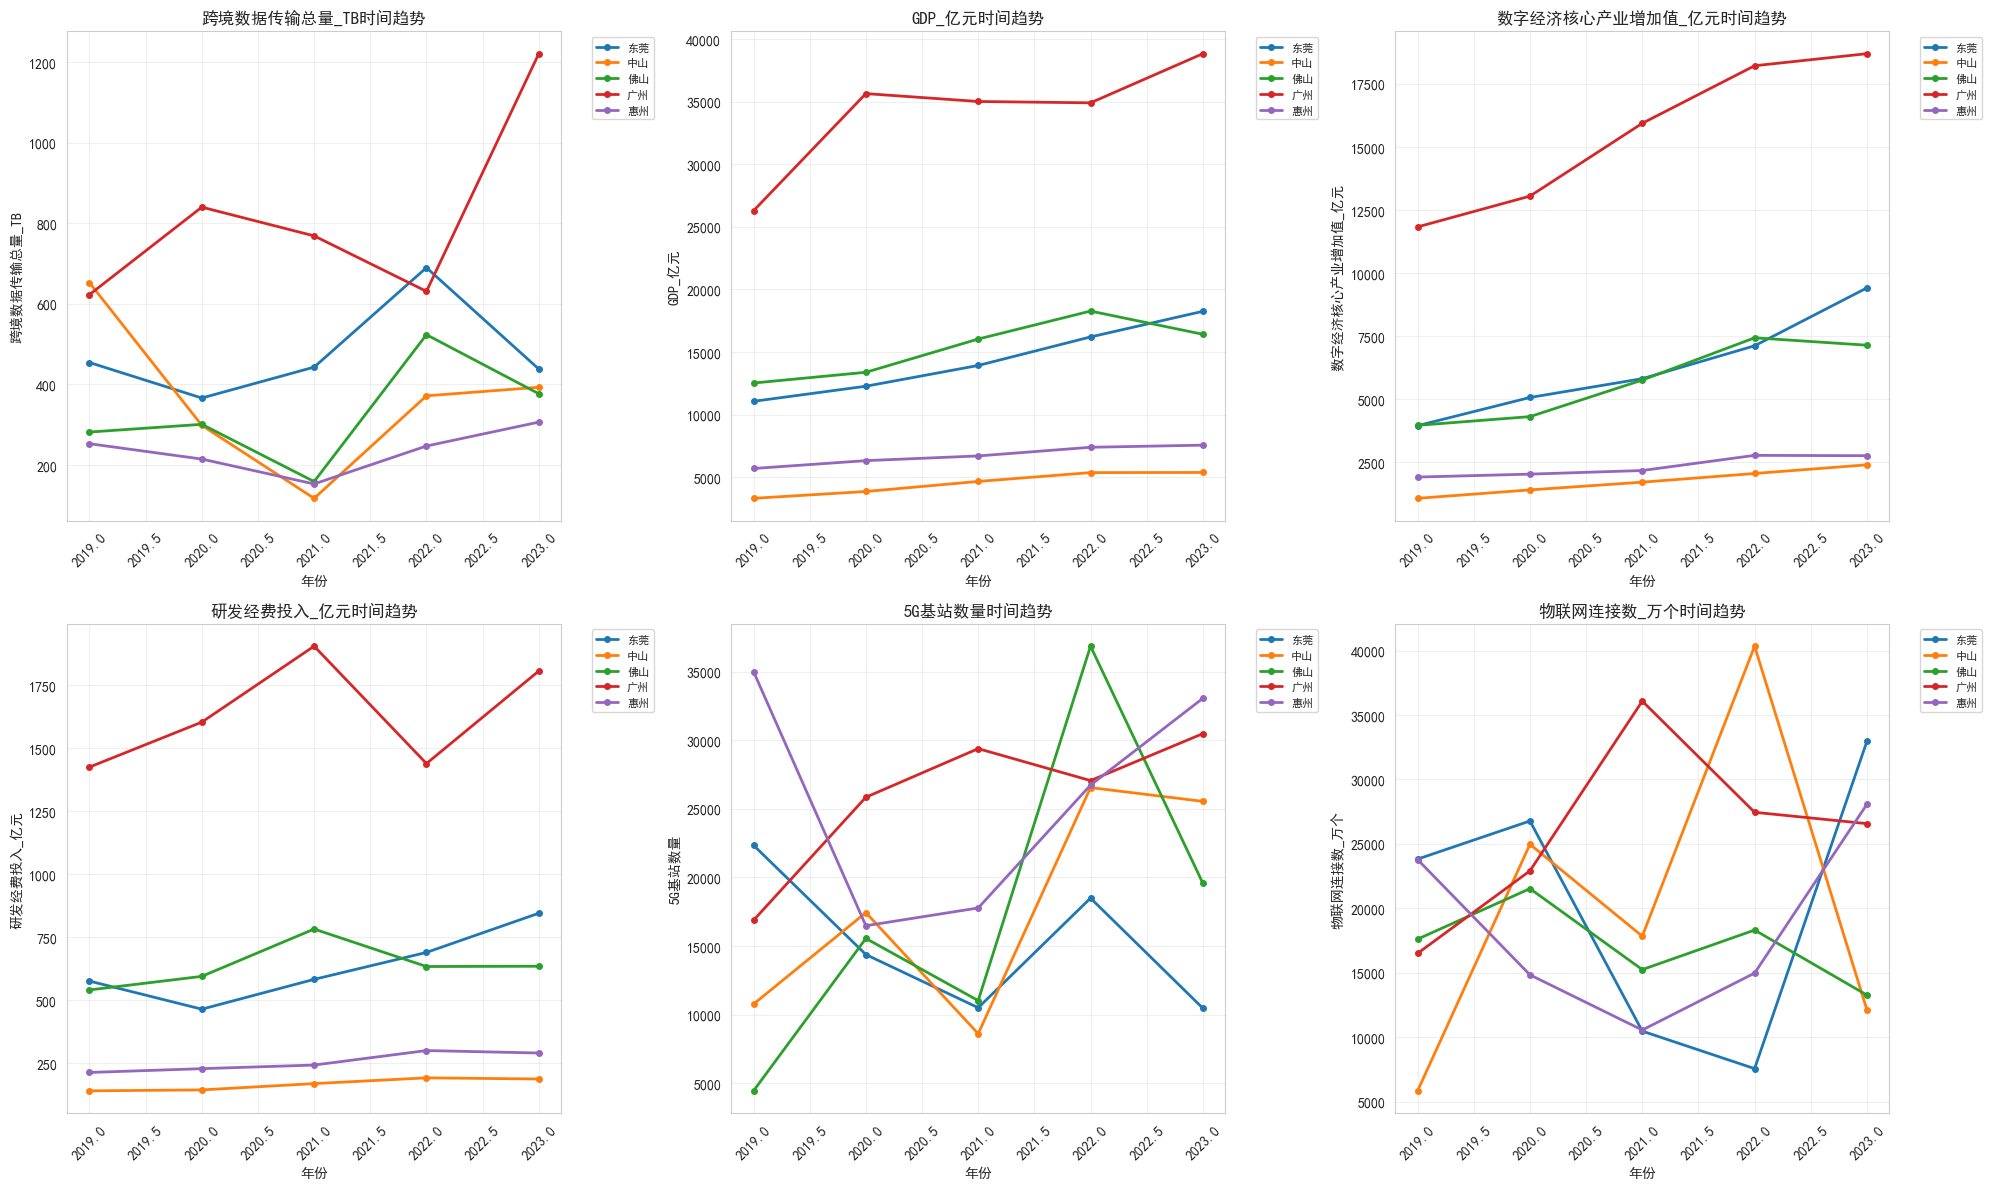


关键指标年均增长率 (%):
  跨境数据传输总量_TB: 9.03%
  GDP_亿元: 11.01%
  数字经济核心产业增加值_亿元: 16.37%
  研发经费投入_亿元: 8.52%
  5G基站数量: 7.09%
  物联网连接数_万个: 10.32%

3. 执行空间分布分析...

空间分布分析


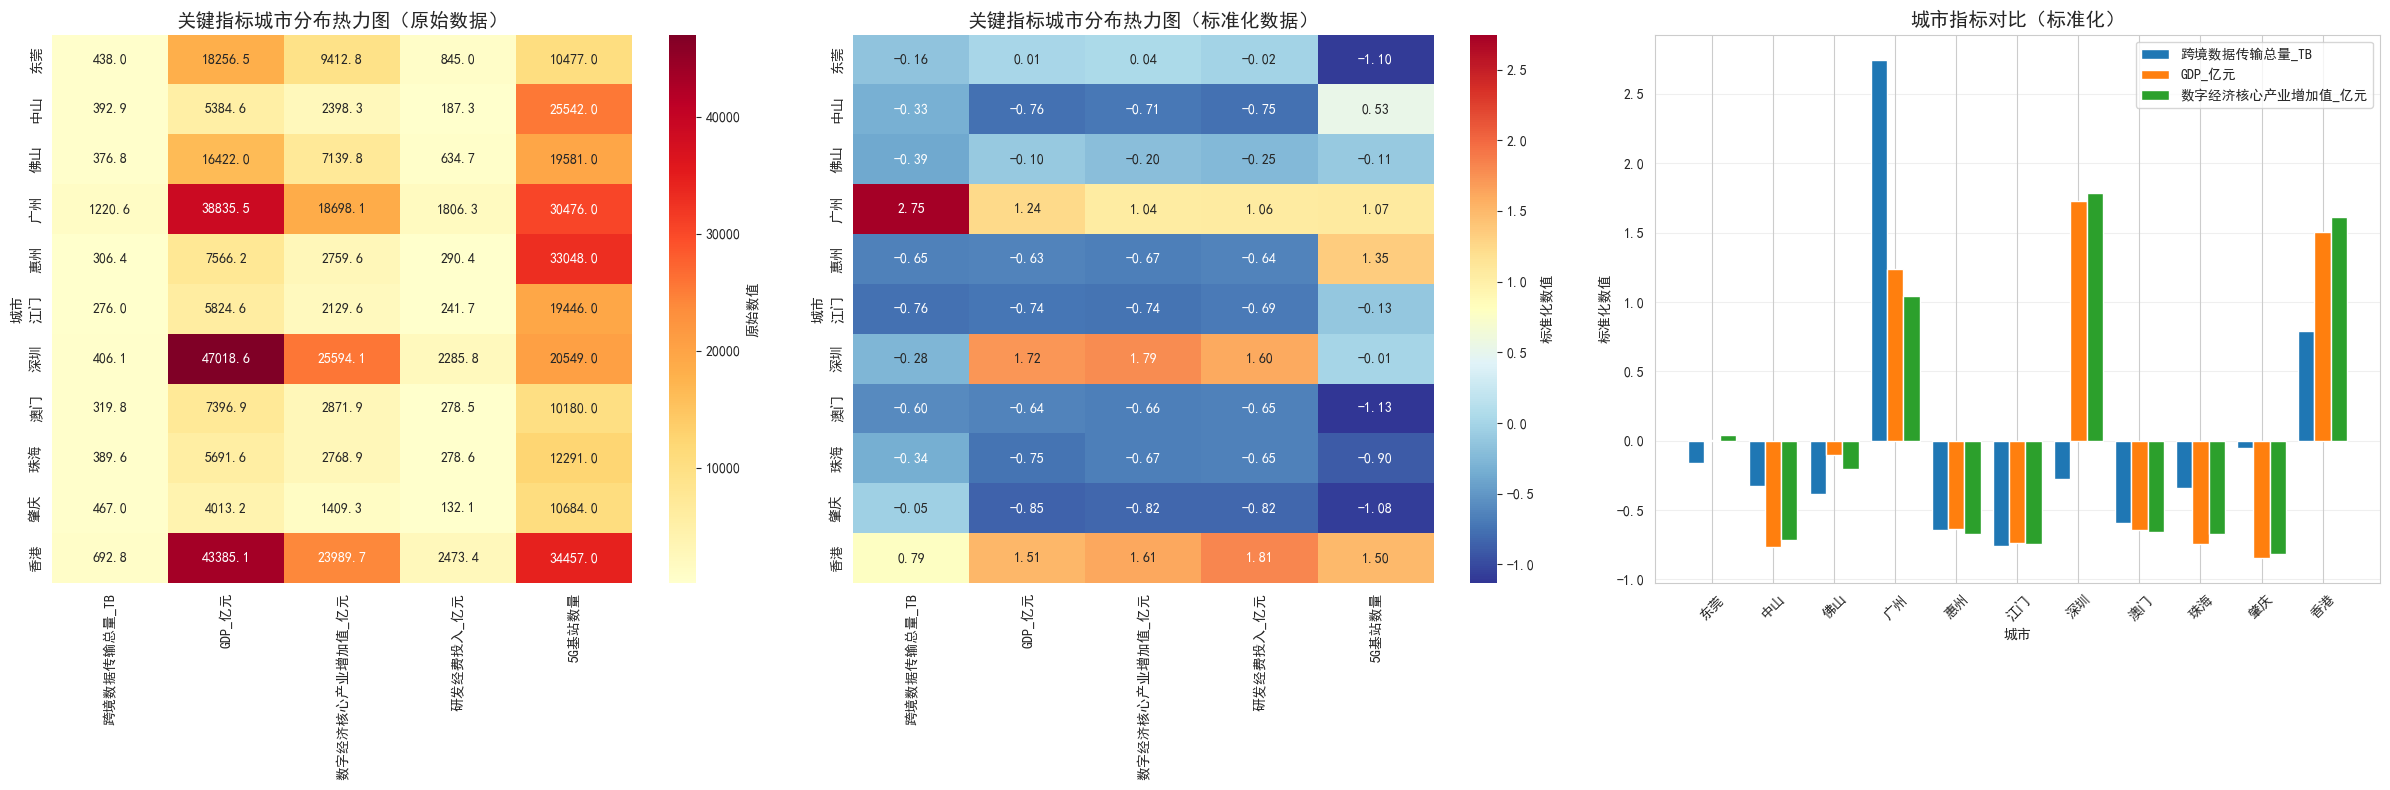


4. 执行不平等分析...

不平等程度分析
数据流动不平等指标:
      gini_coefficient  theil_index  mean_flow  std_flow  cv_flow
2019            0.2951       0.1409   340.0622  182.7741   0.5375
2020            0.2832       0.1480   362.9344  213.9763   0.5896
2021            0.3147       0.1605   334.2580  193.4286   0.5787
2022            0.2618       0.1123   469.7531  235.1642   0.5006
2023            0.2356       0.1126   480.5456  256.7285   0.5342


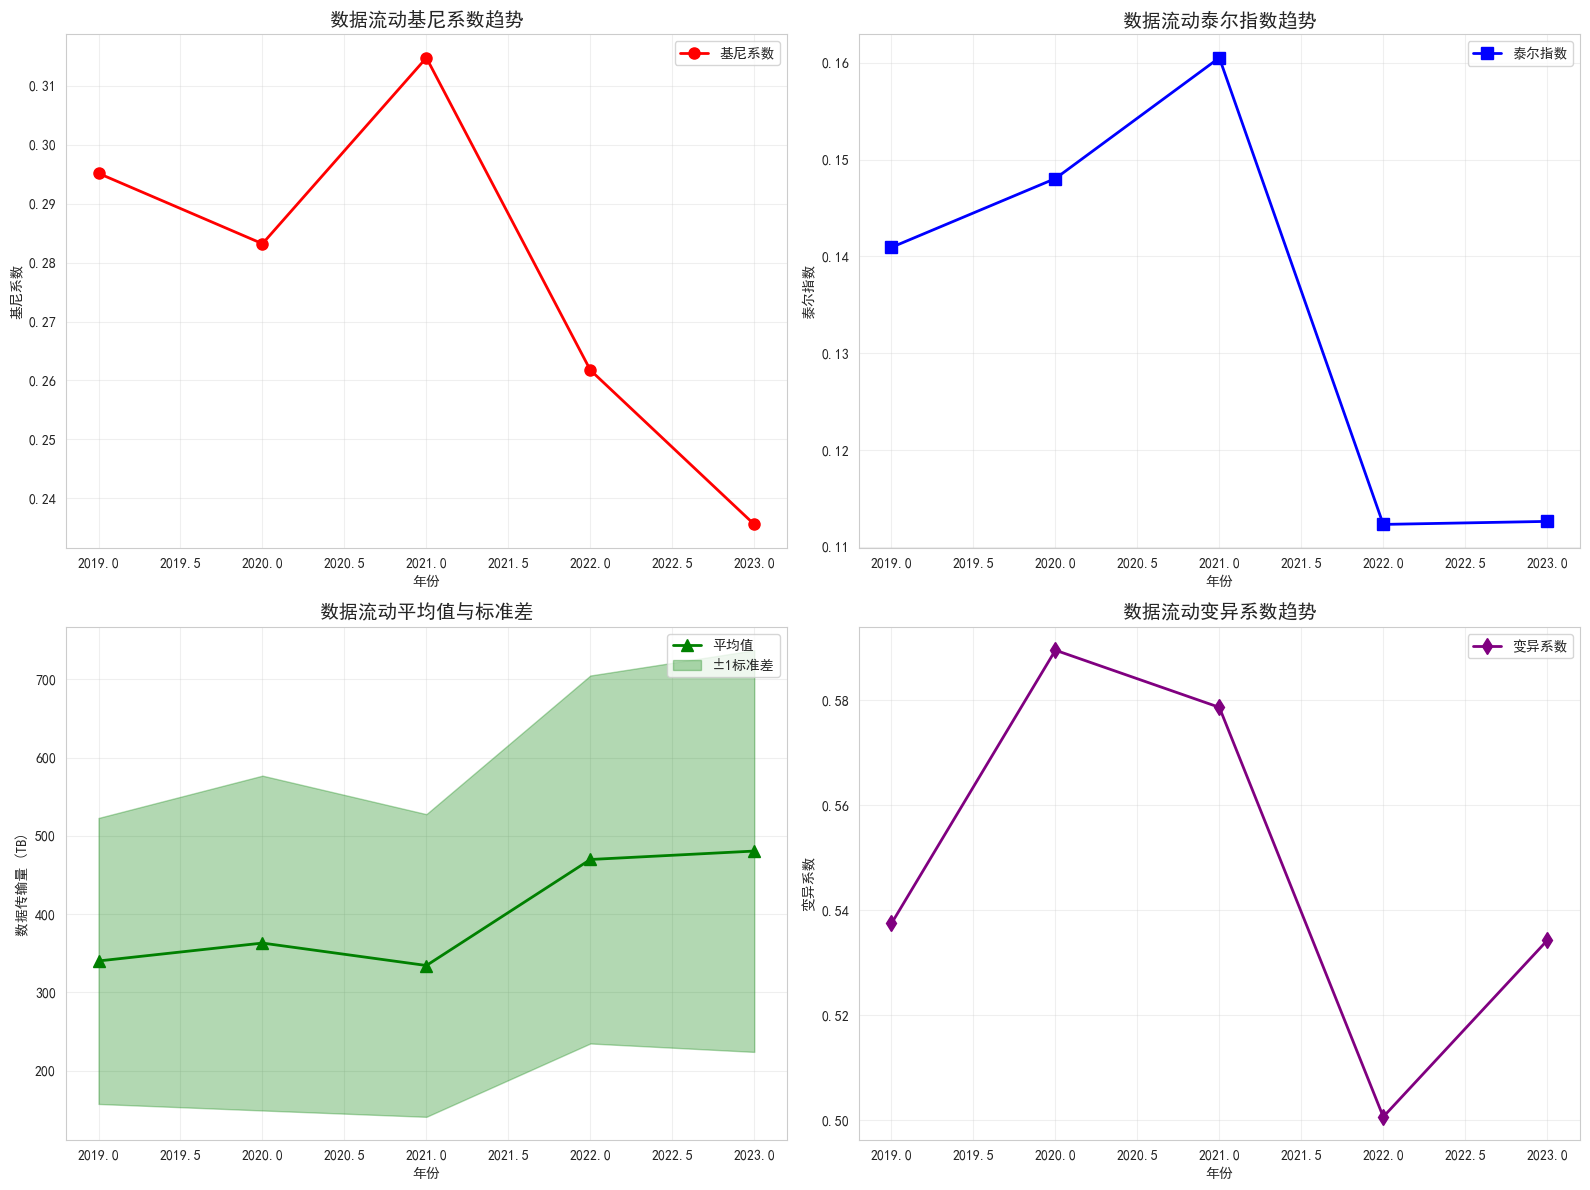

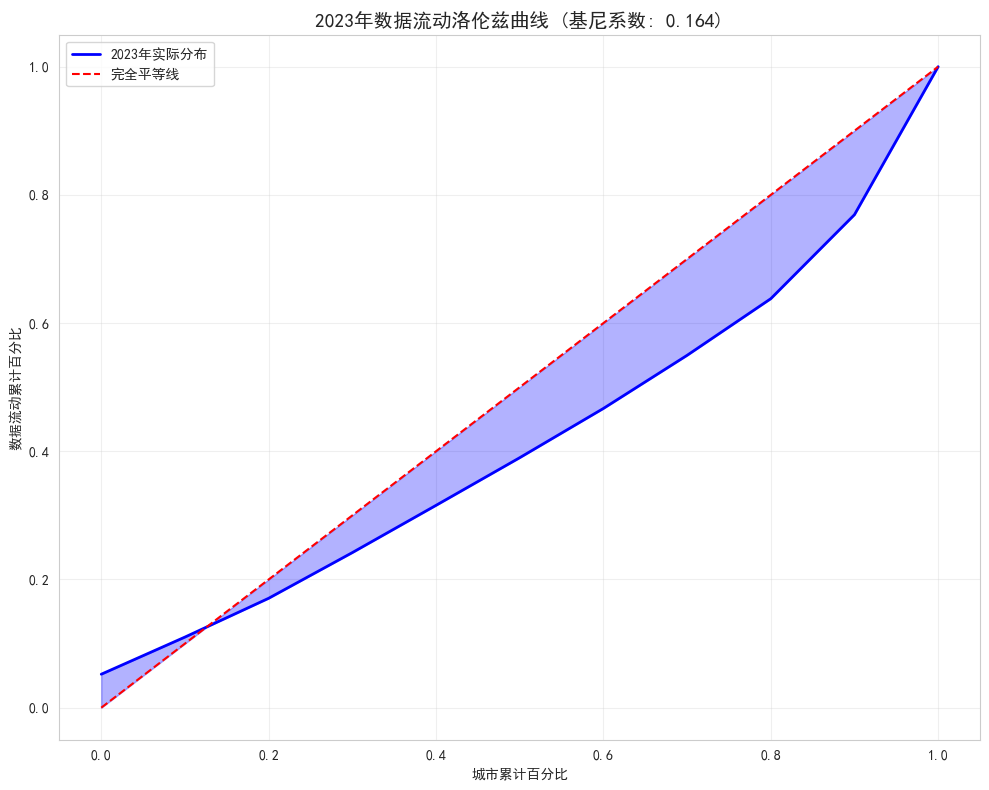


5. 执行相关性分析...

相关性分析
Pearson相关系数矩阵:
                跨境数据传输总量_TB  GDP_亿元  数字经济核心产业增加值_亿元  研发经费投入_亿元  高新技术企业数  \
跨境数据传输总量_TB           1.000   0.618           0.595      0.577    0.491   
GDP_亿元                0.618   1.000           0.987      0.987    0.469   
数字经济核心产业增加值_亿元        0.595   0.987           1.000      0.980    0.448   
研发经费投入_亿元             0.577   0.987           0.980      1.000    0.422   
高新技术企业数               0.491   0.469           0.448      0.422    1.000   
5G基站数量                0.263   0.401           0.391      0.393    0.120   
物联网连接数_万个             0.177   0.498           0.516      0.481    0.126   
金融科技交易规模_亿元           0.202   0.401           0.415      0.411    0.265   
数据中心数量                0.401   0.537           0.540      0.479    0.455   

                5G基站数量  物联网连接数_万个  金融科技交易规模_亿元  数据中心数量  
跨境数据传输总量_TB      0.263      0.177        0.202   0.401  
GDP_亿元           0.401      0.498        0.401   0.537  
数字经济核心产业增加值_亿元   0.391      0.516        

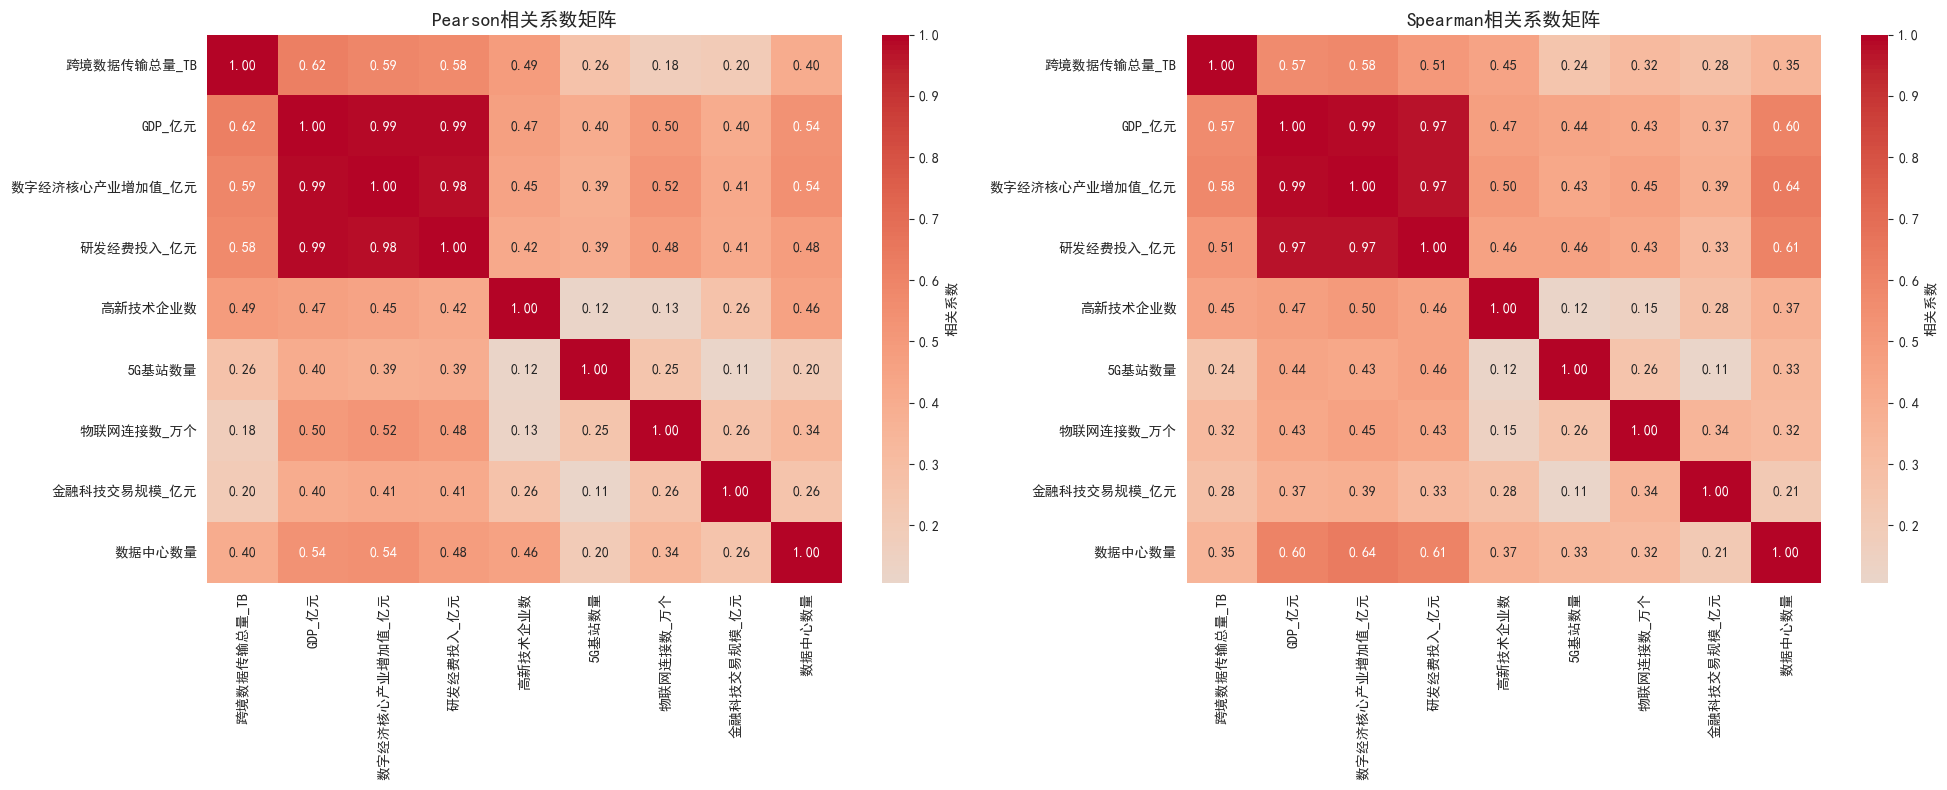


与数据流动最相关的变量 (Pearson):
  GDP_亿元: 0.618 (中等相关)
  数字经济核心产业增加值_亿元: 0.595 (中等相关)
  研发经费投入_亿元: 0.577 (中等相关)
  高新技术企业数: 0.491 (弱相关)
  数据中心数量: 0.401 (弱相关)

探索性数据分析总结
分析范围: 11个城市, 5个年份 (2019-2023)

关键发现:
  • 跨境数据传输总量_TB: 9.0% 年均增长率 (稳定增长)
  • GDP_亿元: 11.0% 年均增长率 (快速增长)
  • 数字经济核心产业增加值_亿元: 16.4% 年均增长率 (快速增长)
  • 研发经费投入_亿元: 8.5% 年均增长率 (稳定增长)
  • 5G基站数量: 7.1% 年均增长率 (稳定增长)
  • 物联网连接数_万个: 10.3% 年均增长率 (快速增长)
  • 数据流动不平等程度: 基尼系数 0.236 (相对平等)
  • 与数据流动最相关的因素: GDP_亿元 (r = 0.618)

分析方法完成:
  ✓ 描述性统计分析
  ✓ 时间趋势分解分析
  ✓ 空间分布可视化
  ✓ 基尼系数与泰尔指数计算
  ✓ 洛伦兹曲线绘制
  ✓ 多重相关性分析

不平等分析结果已保存为 '不平等分析结果.csv'
相关性分析结果已保存为 '相关性分析结果.csv'

探索性数据分析完成！


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图形样式
sns.set_style("whitegrid", {'font.sans-serif': ['SimHei', 'Microsoft YaHei']})


# 手动实现基尼系数计算函数
def calculate_gini(x):
    """计算基尼系数"""
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * x)) / (n * np.sum(x)) - (n + 1) / n

class ExploratoryDataAnalysis:
    def __init__(self, main_data_path, od_matrix_path):
        """
        初始化EDA分析类
        """
        self.main_data = pd.read_csv(main_data_path)
        self.od_matrix = pd.read_csv(od_matrix_path)
        self.cities = self.main_data['城市'].unique()
        self.years = sorted(self.main_data['年份'].unique())
        
    def descriptive_statistics(self):
        """描述性统计分析"""
        print("=" * 60)
        print("描述性统计分析")
        print("=" * 60)
        
        # 选择数值型列进行分析
        numeric_cols = self.main_data.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col not in ['年份', '城市代码']]
        
        # 选择关键指标进行详细分析
        key_metrics = [
            '跨境数据传输总量_TB', 'GDP_亿元', '数字经济核心产业增加值_亿元',
            '研发经费投入_亿元', '高新技术企业数', '5G基站数量',
            '物联网连接数_万个', '金融科技交易规模_亿元'
        ]
        
        available_metrics = [col for col in key_metrics if col in self.main_data.columns]
        
        if not available_metrics:
            print("没有找到关键指标数据")
            return None, None
            
        desc_stats = self.main_data[available_metrics].describe()
        
        # 计算额外的统计量
        desc_stats.loc['cv'] = desc_stats.loc['std'] / desc_stats.loc['mean']  # 变异系数
        desc_stats.loc['skewness'] = self.main_data[available_metrics].skew()  # 偏度
        desc_stats.loc['kurtosis'] = self.main_data[available_metrics].kurtosis()  # 峰度
        
        print("关键指标描述性统计:")
        print(desc_stats.round(4))
        
        # 正态性检验
        print("\n正态性检验 (Shapiro-Wilk):")
        normality_results = []
        for col in available_metrics[:6]:  # 只检验前6个重要变量
            data_clean = self.main_data[col].dropna()
            if len(data_clean) > 3:  # Shapiro-Wilk需要至少3个样本
                stat, p_value = stats.shapiro(data_clean)
                normality_results.append({
                    '变量': col,
                    '统计量': stat,
                    'P值': p_value,
                    '是否正态分布': p_value > 0.05
                })
        
        normality_df = pd.DataFrame(normality_results)
        print(normality_df.round(4))
        
        return desc_stats, normality_df
    
    def time_trend_analysis(self):
        """时间趋势分析"""
        print("\n" + "=" * 60)
        print("时间趋势分析")
        print("=" * 60)
        
        # 选择关键指标进行时间趋势分析
        key_metrics = ['跨境数据传输总量_TB', 'GDP_亿元', '数字经济核心产业增加值_亿元', 
                      '研发经费投入_亿元', '5G基站数量', '物联网连接数_万个']
        
        available_metrics = [col for col in key_metrics if col in self.main_data.columns]
        
        if not available_metrics:
            print("没有找到时间趋势分析所需的数据")
            return {}
        
        # 创建时间趋势图
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.ravel()
        
        for i, metric in enumerate(available_metrics):
            if i < len(axes):
                # 按城市分组的时间趋势
                for city in self.cities[:5]:  # 只显示前5个城市避免过于拥挤
                    city_data = self.main_data[self.main_data['城市'] == city]
                    if not city_data.empty and metric in city_data.columns:
                        axes[i].plot(city_data['年份'], city_data[metric], 
                                   marker='o', label=city, linewidth=2, markersize=4)
                
                axes[i].set_title(f'{metric}时间趋势', fontsize=12, fontweight='bold')
                axes[i].set_xlabel('年份')
                axes[i].set_ylabel(metric)
                axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
                axes[i].grid(True, alpha=0.3)
                axes[i].tick_params(axis='x', rotation=45)
        
        # 隐藏多余的子图
        for i in range(len(available_metrics), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.savefig('时间趋势分析.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 计算增长率
        print("\n关键指标年均增长率 (%):")
        growth_rates = {}
        for metric in available_metrics:
            try:
                first_year_data = self.main_data[self.main_data['年份'] == self.years[0]][metric]
                last_year_data = self.main_data[self.main_data['年份'] == self.years[-1]][metric]
                
                if len(first_year_data) > 0 and len(last_year_data) > 0:
                    first_year = first_year_data.mean()
                    last_year = last_year_data.mean()
                    if first_year > 0:
                        cagr = ((last_year / first_year) ** (1/(len(self.years)-1)) - 1) * 100
                        growth_rates[metric] = cagr
                        print(f"  {metric}: {cagr:.2f}%")
            except:
                continue
        
        return growth_rates
    
    def spatial_distribution_analysis(self):
        """空间分布分析"""
        print("\n" + "=" * 60)
        print("空间分布分析")
        print("=" * 60)
        
        # 选择最新年份的数据进行空间分析
        latest_year = self.main_data['年份'].max()
        data_latest = self.main_data[self.main_data['年份'] == latest_year]
        
        if data_latest.empty:
            print("没有找到最新年份的数据")
            return None
        
        # 创建热力图数据
        heatmap_metrics = ['跨境数据传输总量_TB', 'GDP_亿元', '数字经济核心产业增加值_亿元', 
                         '研发经费投入_亿元', '5G基站数量']
        
        available_metrics = [col for col in heatmap_metrics if col in data_latest.columns]
        
        if len(available_metrics) < 2:
            print("可用指标不足，跳过空间分布分析")
            return None
            
        heatmap_data = data_latest[['城市'] + available_metrics]
        heatmap_data = heatmap_data.set_index('城市')
        
        # 创建可视化
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
        
        # 1. 原始数据热力图
        sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', 
                   ax=ax1, cbar_kws={'label': '原始数值'})
        ax1.set_title('关键指标城市分布热力图（原始数据）', fontsize=14, fontweight='bold')
        
        # 2. 标准化数据热力图
        heatmap_data_normalized = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()
        sns.heatmap(heatmap_data_normalized, annot=True, fmt='.2f', cmap='RdYlBu_r', 
                   ax=ax2, cbar_kws={'label': '标准化数值'})
        ax2.set_title('关键指标城市分布热力图（标准化数据）', fontsize=14, fontweight='bold')
        
        # 3. 城市对比柱状图
        metrics_to_plot = available_metrics[:3]  # 只显示前3个指标
        n_metrics = len(metrics_to_plot)
        
        # 标准化数据用于比较
        comparison_data = heatmap_data_normalized[metrics_to_plot]
        
        x = np.arange(len(comparison_data.index))
        width = 0.8 / n_metrics
        
        for i, metric in enumerate(metrics_to_plot):
            ax3.bar(x + i * width, comparison_data[metric], width, label=metric)
        
        ax3.set_xlabel('城市')
        ax3.set_ylabel('标准化数值')
        ax3.set_title('城市指标对比（标准化）', fontsize=14, fontweight='bold')
        ax3.set_xticks(x + width * (n_metrics - 1) / 2)
        ax3.set_xticklabels(comparison_data.index, rotation=45)
        ax3.legend()
        ax3.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig('空间分布分析.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return heatmap_data
    
    def inequality_analysis(self):
        """不平等程度分析"""
        print("\n" + "=" * 60)
        print("不平等程度分析")
        print("=" * 60)
        
        # 使用基尼系数和泰尔指数分析数据流动不平等
        
        if '跨境数据传输总量_TB' not in self.main_data.columns:
            print("缺少跨境数据传输总量数据，跳过不平等分析")
            return None
            
        years_data = {}
        for year in self.years:
            year_data = self.main_data[self.main_data['年份'] == year]
            data_flow = year_data['跨境数据传输总量_TB'].dropna().values
            
            if len(data_flow) > 1:
                # 基尼系数计算
                gini_coef = calculate_gini(data_flow)
                
                # 泰尔指数计算
                mean_flow = np.mean(data_flow)
                if mean_flow > 0:
                    theil_index = np.mean((data_flow / mean_flow) * np.log(data_flow / np.maximum(mean_flow, 1e-10)))
                else:
                    theil_index = 0
                
                years_data[year] = {
                    'gini_coefficient': gini_coef,
                    'theil_index': theil_index,
                    'mean_flow': mean_flow,
                    'std_flow': np.std(data_flow),
                    'cv_flow': np.std(data_flow) / mean_flow if mean_flow > 0 else 0  # 变异系数
                }
        
        if not years_data:
            print("没有足够的数据进行不平等分析")
            return None
            
        inequality_df = pd.DataFrame(years_data).T
        
        print("数据流动不平等指标:")
        print(inequality_df.round(4))
        
        # 绘制不平等指标趋势
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. 基尼系数趋势
        ax1.plot(inequality_df.index, inequality_df['gini_coefficient'], 
                marker='o', linewidth=2, markersize=8, color='red', label='基尼系数')
        ax1.set_title('数据流动基尼系数趋势', fontsize=14, fontweight='bold')
        ax1.set_xlabel('年份')
        ax1.set_ylabel('基尼系数')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. 泰尔指数趋势
        ax2.plot(inequality_df.index, inequality_df['theil_index'], 
                marker='s', linewidth=2, markersize=8, color='blue', label='泰尔指数')
        ax2.set_title('数据流动泰尔指数趋势', fontsize=14, fontweight='bold')
        ax2.set_xlabel('年份')
        ax2.set_ylabel('泰尔指数')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. 平均值和标准差
        ax3.plot(inequality_df.index, inequality_df['mean_flow'], 
                marker='^', linewidth=2, markersize=8, color='green', label='平均值')
        ax3.fill_between(inequality_df.index, 
                        inequality_df['mean_flow'] - inequality_df['std_flow'],
                        inequality_df['mean_flow'] + inequality_df['std_flow'],
                        alpha=0.3, color='green', label='±1标准差')
        ax3.set_title('数据流动平均值与标准差', fontsize=14, fontweight='bold')
        ax3.set_xlabel('年份')
        ax3.set_ylabel('数据传输量 (TB)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. 变异系数
        ax4.plot(inequality_df.index, inequality_df['cv_flow'], 
                marker='d', linewidth=2, markersize=8, color='purple', label='变异系数')
        ax4.set_title('数据流动变异系数趋势', fontsize=14, fontweight='bold')
        ax4.set_xlabel('年份')
        ax4.set_ylabel('变异系数')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('不平等分析.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 绘制洛伦兹曲线（最新年份）
        latest_year = self.years[-1]
        latest_data = self.main_data[self.main_data['年份'] == latest_year]
        data_flow_latest = latest_data['跨境数据传输总量_TB'].dropna().sort_values().values
        
        if len(data_flow_latest) > 1:
            self.plot_lorenz_curve(data_flow_latest, latest_year)
        
        return inequality_df
    
    def plot_lorenz_curve(self, data, year):
        """绘制洛伦兹曲线"""
        n = len(data)
        lorenz = np.cumsum(np.sort(data)) / np.sum(data)
        perfect_equality = np.linspace(0, 1, n)
        
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # 绘制洛伦兹曲线
        ax.plot(perfect_equality, lorenz, label=f'{year}年实际分布', linewidth=2, color='blue')
        ax.plot(perfect_equality, perfect_equality, label='完全平等线', linestyle='--', color='red')
        
        # 填充区域
        ax.fill_between(perfect_equality, lorenz, perfect_equality, alpha=0.3, color='blue')
        
        # 计算基尼系数（面积法）
        gini_area = 1 - 2 * np.trapz(lorenz, perfect_equality)
        
        ax.set_title(f'{year}年数据流动洛伦兹曲线 (基尼系数: {gini_area:.3f})', 
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('城市累计百分比')
        ax.set_ylabel('数据流动累计百分比')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'洛伦兹曲线_{year}年.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def correlation_analysis(self):
        """相关性分析"""
        print("\n" + "=" * 60)
        print("相关性分析")
        print("=" * 60)
        
        # 选择关键变量进行相关性分析
        key_variables = [
            '跨境数据传输总量_TB', 'GDP_亿元', '数字经济核心产业增加值_亿元',
            '研发经费投入_亿元', '高新技术企业数', '5G基站数量',
            '物联网连接数_万个', '金融科技交易规模_亿元', '数据中心数量'
        ]
        
        available_vars = [col for col in key_variables if col in self.main_data.columns]
        
        if len(available_vars) < 3:
            print("可用变量不足，跳过相关性分析")
            return None
        
        corr_data = self.main_data[available_vars]
        corr_data = corr_data.dropna()
        
        if len(corr_data) < 2:
            print("数据量不足，跳过相关性分析")
            return None
        
        # 计算两种相关系数
        pearson_corr = corr_data.corr(method='pearson')
        spearman_corr = corr_data.corr(method='spearman')
        
        print("Pearson相关系数矩阵:")
        print(pearson_corr.round(3))
        
        print("\nSpearman相关系数矩阵:")
        print(spearman_corr.round(3))
        
        # 绘制相关性热力图
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Pearson相关系数热力图
        sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', 
                   center=0, ax=ax1, cbar_kws={'label': '相关系数'})
        ax1.set_title('Pearson相关系数矩阵', fontsize=14, fontweight='bold')
        
        # Spearman相关系数热力图
        sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', 
                   center=0, ax=ax2, cbar_kws={'label': '相关系数'})
        ax2.set_title('Spearman相关系数矩阵', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('相关性分析.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 找出与数据流动最相关的变量
        if '跨境数据传输总量_TB' in pearson_corr.columns:
            data_flow_corr = pearson_corr['跨境数据传输总量_TB'].drop('跨境数据传输总量_TB')
            top_correlations = data_flow_corr.abs().sort_values(ascending=False).head(5)
            
            print("\n与数据流动最相关的变量 (Pearson):")
            for var, corr_value in top_correlations.items():
                actual_corr = pearson_corr.loc['跨境数据传输总量_TB', var]
                correlation_strength = "强相关" if abs(actual_corr) > 0.7 else "中等相关" if abs(actual_corr) > 0.5 else "弱相关"
                print(f"  {var}: {actual_corr:.3f} ({correlation_strength})")
        
        return {
            'pearson': pearson_corr,
            'spearman': spearman_corr
        }
    
    def generate_comprehensive_report(self):
        """生成综合性EDA报告"""
        print("粤港澳大湾区数据要素流动探索性数据分析报告")
        print("=" * 70)
        
        report_results = {}
        
        try:
            # 1. 描述性统计
            print("\n1. 执行描述性统计分析...")
            desc_stats, normality_results = self.descriptive_statistics()
            report_results['descriptive_stats'] = desc_stats
            report_results['normality_tests'] = normality_results
            
            # 2. 时间趋势分析
            print("\n2. 执行时间趋势分析...")
            growth_rates = self.time_trend_analysis()
            report_results['growth_rates'] = growth_rates
            
            # 3. 空间分布分析
            print("\n3. 执行空间分布分析...")
            spatial_data = self.spatial_distribution_analysis()
            report_results['spatial_data'] = spatial_data
            
            # 4. 不平等分析
            print("\n4. 执行不平等分析...")
            inequality_df = self.inequality_analysis()
            report_results['inequality_analysis'] = inequality_df
            
            # 5. 相关性分析
            print("\n5. 执行相关性分析...")
            corr_results = self.correlation_analysis()
            report_results['correlation_analysis'] = corr_results
            
            # 生成总结
            self.generate_summary(report_results)
            
        except Exception as e:
            print(f"分析过程中出现错误: {e}")
            print("尝试使用简化分析...")
            self.run_simplified_analysis()
        
        return report_results
    
    def generate_summary(self, results):
        """生成分析总结"""
        print("\n" + "=" * 70)
        print("探索性数据分析总结")
        print("=" * 70)
        
        print(f"分析范围: {len(self.cities)}个城市, {len(self.years)}个年份 ({self.years[0]}-{self.years[-1]})")
        
        if 'growth_rates' in results and results['growth_rates']:
            print("\n关键发现:")
            for metric, rate in results['growth_rates'].items():
                trend = "快速增长" if rate > 10 else "稳定增长" if rate > 5 else "缓慢增长"
                print(f"  • {metric}: {rate:.1f}% 年均增长率 ({trend})")
        
        if 'inequality_analysis' in results and results['inequality_analysis'] is not None:
            latest_gini = results['inequality_analysis'].iloc[-1]['gini_coefficient']
            inequality_level = "高度不平等" if latest_gini > 0.5 else "中度不平等" if latest_gini > 0.3 else "相对平等"
            print(f"  • 数据流动不平等程度: 基尼系数 {latest_gini:.3f} ({inequality_level})")
        
        if 'correlation_analysis' in results and results['correlation_analysis'] is not None:
            pearson_corr = results['correlation_analysis']['pearson']
            if '跨境数据传输总量_TB' in pearson_corr.columns:
                top_corr = pearson_corr['跨境数据传输总量_TB'].drop('跨境数据传输总量_TB').abs().idxmax()
                top_corr_value = pearson_corr.loc['跨境数据传输总量_TB', top_corr]
                print(f"  • 与数据流动最相关的因素: {top_corr} (r = {top_corr_value:.3f})")
        
        print("\n分析方法完成:")
        completed_methods = [
            "描述性统计分析",
            "时间趋势分解分析", 
            "空间分布可视化",
            "基尼系数与泰尔指数计算",
            "洛伦兹曲线绘制",
            "多重相关性分析"
        ]
        
        for method in completed_methods:
            print(f"  ✓ {method}")
        
        # 保存关键结果
        try:
            if 'inequality_analysis' in results and results['inequality_analysis'] is not None:
                results['inequality_analysis'].to_csv('不平等分析结果.csv', encoding='utf-8-sig')
                print("\n不平等分析结果已保存为 '不平等分析结果.csv'")
                
            if 'correlation_analysis' in results and results['correlation_analysis'] is not None:
                results['correlation_analysis']['pearson'].to_csv('相关性分析结果.csv', encoding='utf-8-sig')
                print("相关性分析结果已保存为 '相关性分析结果.csv'")
                
        except Exception as e:
            print(f"保存文件时出现错误: {e}")
    
    def run_simplified_analysis(self):
        """简化版分析（当完整分析出现问题时）"""
        print("执行简化版探索性分析...")
        
        # 基本描述性统计
        numeric_cols = self.main_data.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col not in ['年份', '城市代码']]
        
        if len(numeric_cols) > 0:
            print("基本描述性统计:")
            print(self.main_data[numeric_cols].describe().round(2))
        
        # 简单可视化
        plt.figure(figsize=(12, 8))
        latest_data = self.main_data[self.main_data['年份'] == self.main_data['年份'].max()]
        
        if '跨境数据传输总量_TB' in latest_data.columns and 'GDP_亿元' in latest_data.columns:
            plt.scatter(latest_data['GDP_亿元'], latest_data['跨境数据传输总量_TB'])
            for i, city in enumerate(latest_data['城市']):
                plt.annotate(city, (latest_data['GDP_亿元'].iloc[i], latest_data['跨境数据传输总量_TB'].iloc[i]),
                           fontsize=8)
            
            plt.xlabel('GDP (亿元)')
            plt.ylabel('跨境数据传输量 (TB)')
            plt.title('GDP与数据流动关系散点图')
            plt.grid(True, alpha=0.3)
            plt.savefig('简化分析图.png', dpi=300, bbox_inches='tight')
            plt.show()

# 执行EDA分析
if __name__ == "__main__":
    try:
        print("开始执行探索性数据分析...")
        eda = ExploratoryDataAnalysis('main_data_advanced.csv', 'od_matrix.csv')
        results = eda.generate_comprehensive_report()
        print("\n探索性数据分析完成！")
        
    except Exception as e:
        print(f"执行过程中出现错误: {e}")
        print("请检查数据文件路径和格式")